This is the value for the optimized function: 2.8527280303807087e-23. 
It's practically zero.
Which means we found the input values where our function produces zero.
The optimized parameters:
 -Initial velocity: 27.974438041768813 m/s
 -Initial angle: 0.6261947071300409 rad 
 -Initial height = 2.2868502188498225 m
As we can see, using the values of the Initial velocity, angle, 
and height, we can acquire the trajectory that fits our requirements.


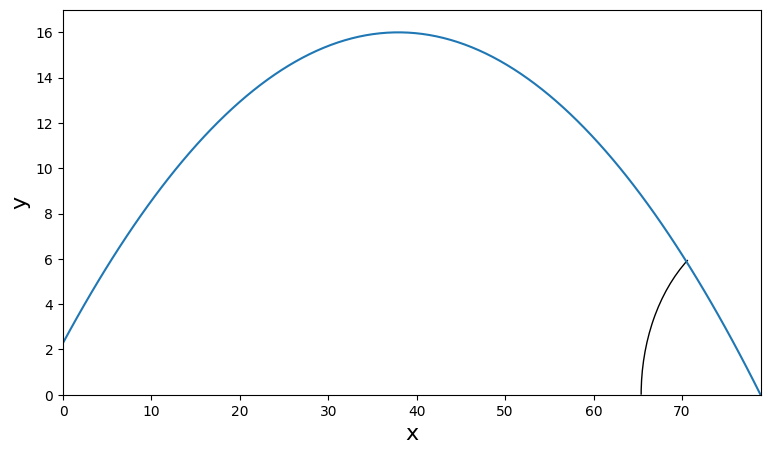

In [124]:
# Exercise 4.1
# Author: Felix Cahyadi
# Date: 09.10.2023

#Import libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Create the function that returns the three equation
def parabola(x):
    """A function that returns the sum of squares of the three equation

    Args:
        x (list): List containing v, theta, and h

    Returns:
        result: the sum of squares of the three equation
    """
    
    # Unpack the values
    v = x[0]
    theta = x[1] #in radian
    h = x[2]

    # Some constants
    g = 9.8
    t = 3.48

    # Return an array
    y = []
    # Append the first equation
    y.append((v*np.cos(theta)*t)-78.88) # From horizontal distance
    y.append(g*t - v*np.sin(theta) - v*np.cos(theta)*np.tan(np.deg2rad(38))) # From angle equation
    y.append(h + v*np.sin(theta)*t - 0.5*g*(t**2)) # From vertical distance

    return np.sum(np.square(y)) # sum the square of everything so that the minimization tends toward zero

# We use guess the initial vector as 22,0.1,1
result = minimize(parabola, [27,0.9,3], method='powell')
print(f"This is the value for the optimized function: {result['fun']}. \nIt's practically zero.\nWhich means we found the input values where our function produces zero.")
print(f"The optimized parameters:\n -Initial velocity: {result['x'][0]} m/s\n -Initial angle: {result['x'][1]} rad \n -Initial height = {result['x'][2]} m")

# To show that this is the right solution, we are going to plot the trajectory
def trajectory(v, theta, h, t, g = 9.8):
    x = v*np.cos(theta)*t # The x trajectory
    y = h + v*np.sin(theta)*t - 0.5*g*(t**2) # The y trajectory
    return x, y

# Create the time array to calculate the trajectory
t_arr = np.linspace(0,3.48, 100) # Plot the time from t = 0 to t = 3.48
x_arr, y_arr = trajectory(result['x'][0], result['x'][1], result['x'][2], t_arr)

# Plot the trajectory
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x_arr, y_arr)
ax.set_xlim((0,78.88))
ax.set_ylim((0,17))
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)

# Draw the arc patch using the result that we have acquired, to show that we acquired the correct value
angle_patch = Arc((78.88,0),width=27, height=15, theta1 = 180-np.rad2deg(result['x'][1]), theta2 = 180)
ax.add_patch(angle_patch)

print("As we can see, using the values of the Initial velocity, angle, \nand height, we can acquire the trajectory that fits our requirements.")

plt.show()

This is the value of the potential energy: 0.920565610860058
These are the coordinates of the points:
P1 = (0.5294117803891057,-0.1)
P2 = (0.8823530525953132,0.0)
P3 = (1.0,-0.07692290836033713)
P4 = (0.9,-0.3076919352753707)


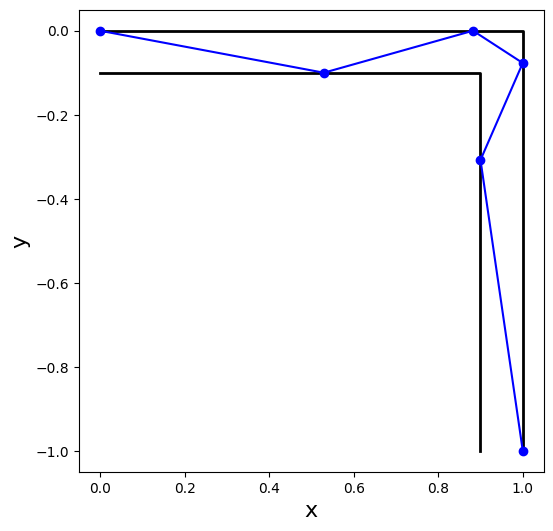

In [125]:
# Exercise 4.2
# Author: Felix Cahyadi
# Date: 09.10.2023

# Import libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
# Define the equations
def springs(x):
    """ The function that we use to calculate the potentials of the spring

    Args:
        x (list): a list containing the value of (x1, x2, y3, y4)

    Returns:
        potential energy: the sum of the potential energy of the springs
    """

    # Unpack values
    x1, x2, y3, y4 = x

    # Define the constants
    # lengths
    d = 0.1
    H = 1
    W = 1

    # spring constants
    k1 = 2
    k2 = 3
    k3 = 9
    k4 = 3
    k5 = 1

    # Calculate the energy
    E = []
    E.append(0.5*k1*(x1**2 + d**2))
    E.append(0.5*k2*((x2-x1)**2 + d**2))
    E.append(0.5*k3*((W-x2)**2 + y3**2))
    E.append(0.5*k4*(d**2 + (y4-y3)**2))
    E.append(0.5*k5*(d**2 + (-H-y4)**2))

    return np.sum(E)

# Define size
d = 0.1
H = 1
W = 1

# define the boundaries
bound = []
bound.append([0,W-d])
bound.append([0,W])
bound.append([-H,0])
bound.append([-H,-d])

# Initial guess
init_x = [0.1,0.2,-0.5,-0.5]

# Minimize stuff
result = minimize(springs,x0=init_x,bounds=bound)
print(f"This is the value of the potential energy: {result['fun']}")
coords = result['x']
x_arr = np.array([0,coords[0],coords[1], W, W-d, W]) # Collect the x values
y_arr = np.array([0,-d,0,coords[2],coords[3],-H]) # Collect the y values

print("These are the coordinates of the points:")
for i in range(1,len(x_arr)-1):
    print(f"P{i} = ({x_arr[i]},{y_arr[i]})")

# plot
fig, ax = plt.subplots(figsize = (6,6))
ax.set_ylabel('y', fontsize = 16)
ax.set_xlabel('x', fontsize = 16)

# Plot the lines
ax.plot([0,W,W],[0,0,-H], linewidth = 2, color = 'black')
ax.plot([0,W-d,W-d],[-d,-d,-H], linewidth = 2, color = 'black')

# Plot the coordinates
ax.plot(x_arr,y_arr,'b', marker = 'o')
plt.show()

The optimized distance is r = 1.6305095428824878, with V(r) = -0.14261159579279786


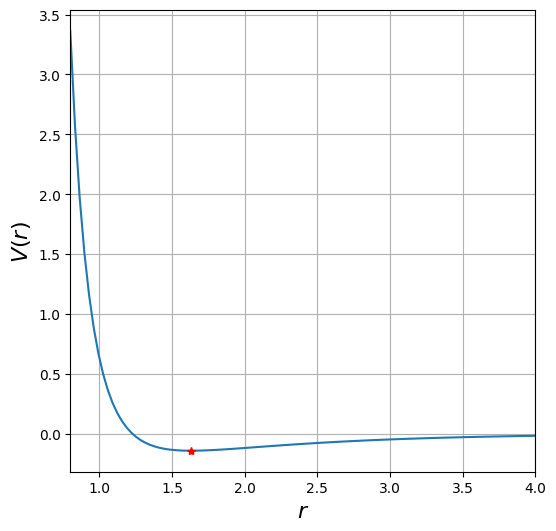

In [129]:
# Exercise 4.3
# Author: Felix Cahyadi
# Date: 09.10.2023

# Import libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function that we want to minimize
def V(r,*args, V0 = 1.0, sigma = 1.0):
    """ The function that calculates the potential

    Args:
        r (float): The distance from the atomic center
        V0 (float, optional): V0 constant. Defaults to 1.0.
        sigma (float, optional): sigma constant. Defaults to 1.0

    Returns:
        potential : The potential
    """
    return V0*(((sigma/r)**6) - np.exp(-r/sigma))

# I think this problem would be easier to solve if we plot it
fig, ax = plt.subplots(figsize = (6,6))
r_arr = np.linspace(0.8,4,100)
V_arr = V(r_arr)
ax.plot(r_arr,V_arr)

result = minimize(V, 1.5)
r_opt = result['x'][0] # The optimized r coordinate

print(f"The optimized distance is r = {r_opt}, with V(r) = {V(r_opt)}")

# Plot the optimized result in the graph
ax.plot(r_opt, V(r_opt),'r*')
ax.set_ylabel("$V(r)$", fontsize = 16)
ax.set_xlabel("$r$", fontsize = 16)
ax.set_xlim([0.8,4])
ax.grid(True)
plt.show()

The optimized x = 2.717395494936947, with |$y_1$ - $y_2$| = 0.11999848374349353


[]

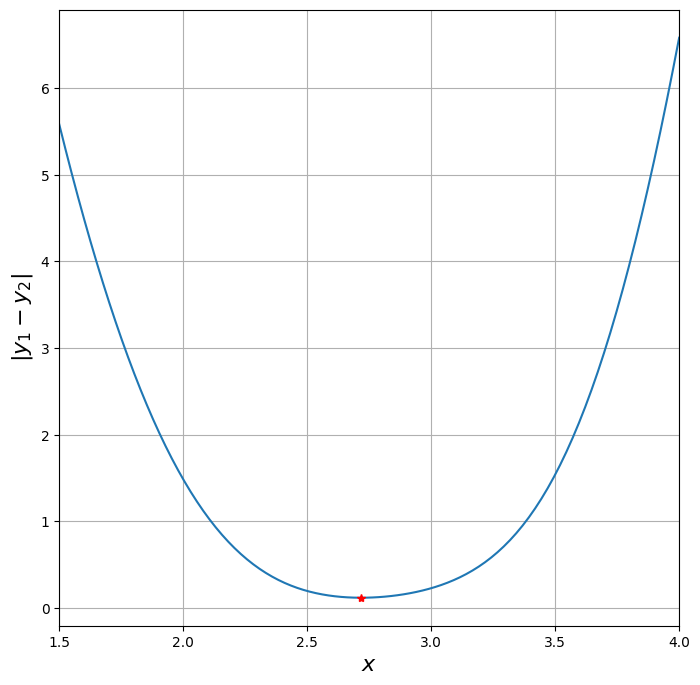

In [128]:
# Exercise 4.4
# Author: Felix Cahyadi
# Date: 09.10.2023

# Import libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function that we want to minimize
def y_difference(x):
    """ Calculating the distance between two curves

    Args:
        x (float): the x coordinate

    Returns:
        y difference: the difference in y of both curves at x
    """
    
    y1 = np.sin(x**(1.55))
    y2 = 5*((x-np.e)**2) - 0.88

    return np.abs(y1-y2)

# Plot it so that everything is easier to solve
x_arr = np.linspace(1.5,4,100)
y_arr = y_difference(x_arr)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_arr, y_arr)

# Here, we know that x is not negative, otherwise the value x**1.55 would be a complex number. 
result = minimize(y_difference, 3)
x_opt = result['x'][0] # The optimized x coordinate
y_diff = result['fun']

print(f"The optimized x = {x_opt}, with |$y_1$ - $y_2$| = {y_diff}")

# Plot the optimized result in the graph
ax.plot(x_opt, y_diff, 'r*')
ax.set_ylabel("$|y_1 - y_2|$", fontsize = 16)
ax.set_xlabel("$x$", fontsize = 16)
ax.set_xlim([1.5,4])
ax.grid(True)

plt.plot()